Please leave an upvote,Thank you!!

## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 

Not sure where to begin? Scroll to the bottom to find challenges!

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Negative order quantities indicate returns. Which products have been returned the most?
- 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
- 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for an online retailer. Currently, the retailer sells over 4000 unique products. To take inventory of the items, your manager has asked you whether you can group the products into a small number of categories. The categories should be similar in terms of price and quantity sold and any other characteristics you can extract from the data.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

before exploring a data write down short list of what u expect to see in the data 
1. the distribution of key variables.
2. the relationship btw important variables
3. check for oddity during analysis
4. check reason for oddity

Importing the libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [43]:
df = pd.read_csv('online_retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


**Dataset Summary**

In [44]:
# number of rows and columns
df.shape

(541909, 8)

In [45]:
# Checking for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [46]:
# data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
# Boxplot to check for outliers in dataset
df.boxplot()

<AxesSubplot: >

In [48]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [49]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

**Data Cleaning and processing**

In [50]:
df['CustomerID'].mode()

0    17841.0
Name: CustomerID, dtype: float64

In [51]:
# Handling 'Description' missing values
df['Description'].fillna(df['Description'].mode()[0],inplace=True)

In [52]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [53]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,WHITE HANGING HEART T-LIGHT HOLDER,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/11 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/11 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/11 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/11 10:26,10.79,NaN,United Kingdom


majority of null value are from the united kingdom

In [54]:
#Handling 'CustomerID' missing value
df['CustomerID'].fillna(df['CustomerID'].mode()[0], inplace=True)


In [55]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [56]:
#Subsetting for cancelled sales
cancelled_sales = df[df['Quantity']<0]
cancelled_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


,Description,Quantity
1220,"PAPER CRAFT , LITTLE BIRDIE",-80995
1056,MEDIUM CERAMIC TOP STORAGE JAR,-74494
1932,WHITE HANGING HEART T-LIGHT HOLDER,-48734
2063,printing smudges/thrown away,-19200
1842,"Unsaleable, destroyed.",-15644
2024,check,-13247
67,?,-9496
1497,ROTATING SILVER ANGELS T-LIGHT HLDR,-9376
1355,Printing smudges/thrown away,-9058
559,Damaged,-7540


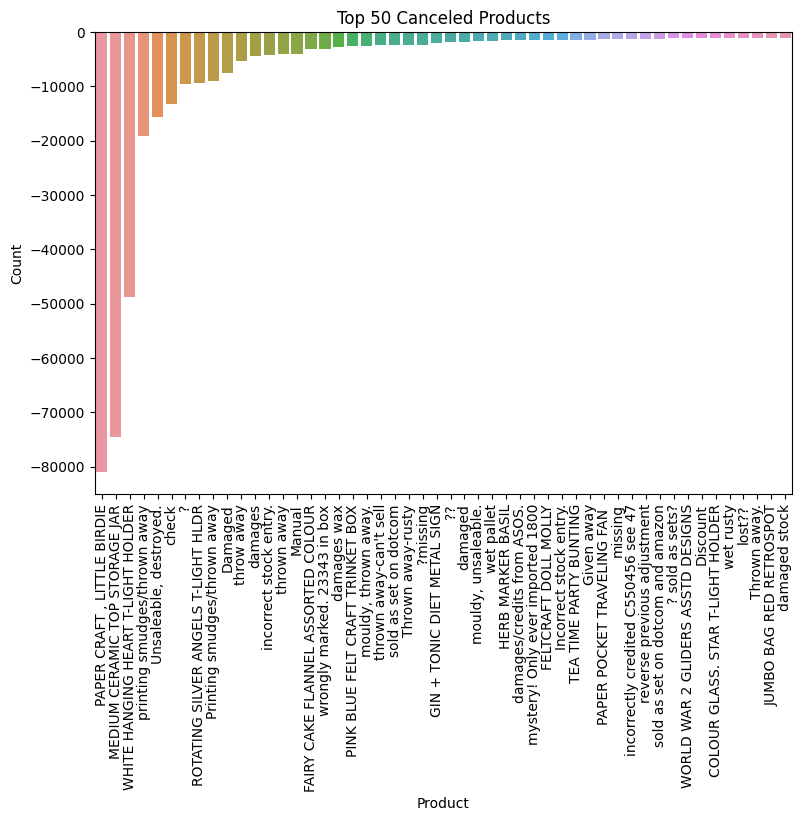

In [125]:
#Product with the highest cancellation
num_canc = cancelled_sales.groupby('Description')['Quantity'].sum().reset_index()


#Visualizing top 50 cancelled product
top_50 = num_canc.sort_values(by='Quantity',ascending=True).head(50)
display(top_50)

fig, ax = plt.subplots(figsize=(9, 6))

sns.barplot(data=top_50, x='Description', y='Quantity')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 50 Canceled Products')
plt.show()

In [58]:
#Creating new column for the total price of each sale (cost of goods sold)
df['Revenue'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France,16.60


In [59]:
#Subsetting for actual sales 
actual_sales = df[df['Revenue']>0]
actual_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France,16.60


In [60]:
#Converting date to datetime
actual_sales['InvoiceDate'] = pd.to_datetime(actual_sales['InvoiceDate'])
actual_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [61]:
# checking if InvoiceDate has been changed to datetime
assert actual_sales['InvoiceDate'].dtype == 'datetime64[ns]'

In [62]:
#Filtering for United Kingdom only
uk_sales = actual_sales[actual_sales['Country']=='United Kingdom']
uk_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [63]:
#Extracting month and year
uk_sales['month'] = uk_sales['InvoiceDate'].dt.month
uk_sales['year'] = uk_sales['InvoiceDate'].dt.year

Data Visualization

In [64]:
#Country with highest sale
country_stat = actual_sales.groupby('Country').agg({'Quantity':'sum'}).reset_index()
country_stat.sort_values(by='Quantity',ascending=False,inplace=True)
display(country_stat[country_stat['Country']!='United Kingdom']['Quantity'].sum())
country_stat

925986

,Country,Quantity
36,United Kingdom,4662390
24,Netherlands,200361
10,EIRE,147173
14,Germany,119261
13,France,112103
0,Australia,83901
32,Sweden,36083
33,Switzerland,30629
31,Spain,27940
20,Japan,26016


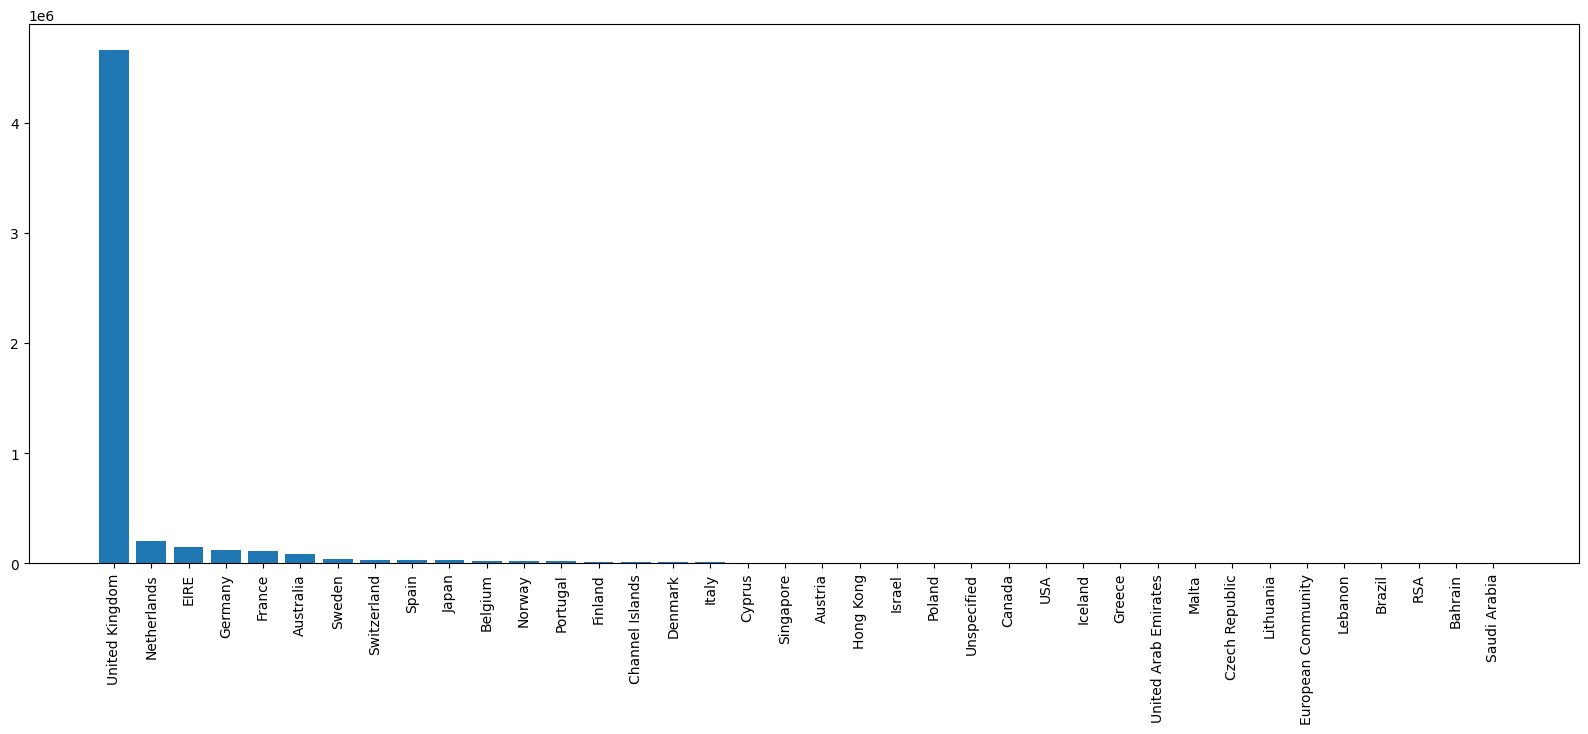

In [65]:
#Visualizing result
plt.subplots(figsize=(20,7))
plt.bar(country_stat['Country'],country_stat['Quantity'])
plt.xticks(rotation=90)
plt.show()
#0r plt.barh()

In [68]:
# what is the overall sales trend by month and by year?

# sort InvoiceDate format as YYYY-MM
actual_sales['InvoiceDate'] = pd.to_datetime(actual_sales["InvoiceDate"].dt.strftime('%Y-%m'))


monthly_sales = actual_sales.groupby('InvoiceDate')['Revenue'].sum().reset_index()
monthly_sales.sort_values(by='InvoiceDate',ascending=True)


,InvoiceDate,Revenue
0,2010-12-01,823746.140
1,2011-01-01,691364.560
2,2011-02-01,523631.890
3,2011-03-01,717639.360
4,2011-04-01,537808.621
5,2011-05-01,770536.020
6,2011-06-01,761739.900
7,2011-07-01,719221.191
8,2011-08-01,759138.380
9,2011-09-01,1058590.172


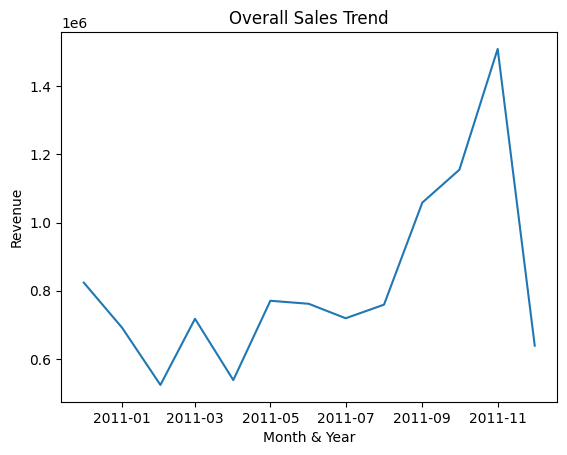

In [69]:
plt.plot(monthly_sales['InvoiceDate'],monthly_sales['Revenue'])
plt.xlabel("Month & Year")
plt.ylabel("Revenue")
plt.title("Overall Sales Trend")
plt.show()

In [70]:
# total price and quantity order per day
corr = actual_sales.groupby('InvoiceDate')['Revenue','Quantity'].sum().reset_index()
corr


,InvoiceDate,Revenue,Quantity
0,2010-12-01,823746.140,359239
1,2011-01-01,691364.560,387785
2,2011-02-01,523631.890,283555
3,2011-03-01,717639.360,377526
4,2011-04-01,537808.621,308815
5,2011-05-01,770536.020,395738
6,2011-06-01,761739.900,389213
7,2011-07-01,719221.191,401759
8,2011-08-01,759138.380,421770
9,2011-09-01,1058590.172,570820


Determining if Total price correlates or depends on Quantity ordered

In [72]:
#Checking correlation
corr['Quantity'].corr(corr['Revenue'])

0.9787062278417469

the corelation coefficient is close to 1 therefore there is a strong relationship

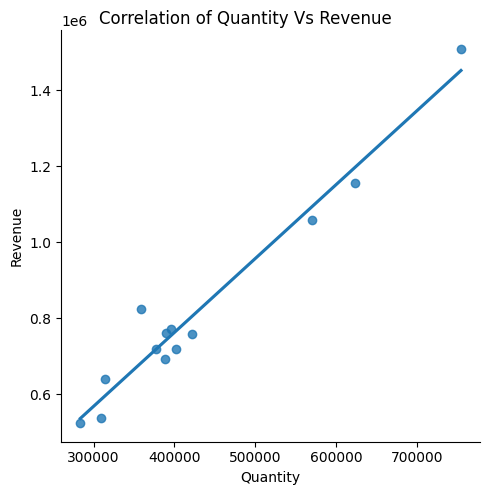

In [73]:
# Plotting Total price Quantity correlation
g = sns.lmplot(x='Quantity',y='Revenue',data=corr,ci=None)
g.fig.suptitle('Correlation of Quantity Vs Revenue' )
plt.show()